In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import seaborn as sns

In [30]:
# Load the Iris flower dataset:
iris = datasets.load_iris()
X =  pd.DataFrame(iris.data) 
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Using LDA ###

In [24]:
# Create an LDA that will reduce the data 
lda = LinearDiscriminantAnalysis()

# run an LDA and use it to transform the features
X_lda = lda.fit(X,y).transform(X)

In [25]:
# Print the number of features
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_lda.shape[1])

Original number of features: 4
Reduced number of features: 2


In [21]:
## View the ratio of explained variance
lda.explained_variance_ratio_

array([0.99147248])

In [32]:
data = pd.DataFrame(X_lda)
data['Class'] = y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-8.084953,0.328454,0
1,-7.147163,-0.755473,0
2,-7.511378,-0.238078,0
3,-6.837676,-0.642885,0
4,-8.157814,0.540639,0


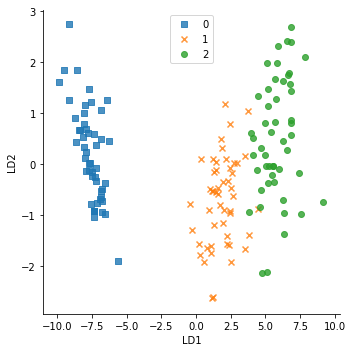

In [35]:
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()

### Using PCA ###

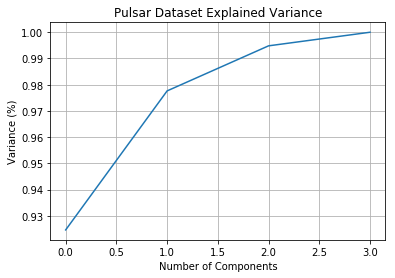

In [37]:
pca = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.grid(True)
plt.show()

In [42]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [43]:
datapca = principalDf.copy()

In [44]:
datapca['class'] = y
datapca.columns=["PC1","PC2","class"]
datapca.head()

,PC1,PC2,class
0,-2.684207,0.326607,0
1,-2.715391,-0.169557,0
2,-2.889820,-0.137346,0
3,-2.746437,-0.311124,0
4,-2.728593,0.333925,0


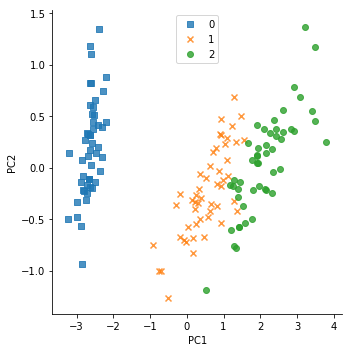

In [45]:
markers = ['s', 'x','o']
colors = ['r', 'b','g']
sns.lmplot(x="PC1", y="PC2", data=datapca, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()